In [1]:
import pandas as pd

## important installlation for wordcloud
!pip install --upgrade pip

!pip install --upgrade Pillow

In [271]:

# List of file names for our datasets
file_names = ['metalawarenessmonthwatson.csv',
              'youtube_comments2.csv', 
              'therapist_reacts.csv',
              'psychhub2.csv',
              'goodmorningam.csv',
              'menshealthuk.csv',
              'mylife16.csv',
              'drpatterson.csv',
              'cominghome.csv',
              'unfilteredstories.csv',
              'cna.csv',
              'Power106.csv',
              'psych2Go.csv',
              'seeker.csv',
              'trentShelton.csv',
              'brianjohnson.csv',
              'doesntlooksuicidal.csv',
              'laurenashley.csv',
              'lifeoflofe.csv',
              'jubilee.csv',
              'onsuicide.csv',
              'today.csv',
              'insideEdition.csv',
              'whatILearnedHusb.csv',
              'cnnLinkinPwife.csv',
              'parentBlindsided.csv',
              'parentAthlete.csv',
              'norwich.csv'
             ]

# Create an empty list to store DataFrames
dataframes = []

# Read each CSV file into a DataFrame and add it to the list
for file_name in file_names:
    df = pd.read_csv(file_name)
    dataframes.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
print(combined_df.head())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             comment
0                                                                                                                                                                                                                                                                                                  

In [272]:
#Make a copy of dataframe
df = combined_df.copy()
df2 = combined_df.copy()

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25094 entries, 0 to 25093
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  24805 non-null  object
dtypes: object(1)
memory usage: 196.2+ KB


## remove null values now we have 11947  rows

In [274]:
## remove null values now we have 7121 rows
df = df.dropna(subset=['comment'])

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24805 entries, 0 to 25093
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  24805 non-null  object
dtypes: object(1)
memory usage: 387.6+ KB


## Remove duplicate comments

In [276]:
df.drop_duplicates(subset=['comment'], inplace=True)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24343 entries, 0 to 25093
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  24343 non-null  object
dtypes: object(1)
memory usage: 380.4+ KB


## Do emotional sentiment of comments using NRCLex

In [278]:
## Emotion sentiment of comments
import pandas as pd
from nrclex import NRCLex

# Assuming you have a DataFrame called df with a 'comment' column containing text data


# Drop rows with null values in the 'comment' column
#df = df.dropna(subset=['comment'])

# Function to get sentiment scores and dominant emotion
def analyze_text(text):
    text_object = NRCLex(text)
    sentiment_scores = text_object.raw_emotion_scores
    if not sentiment_scores:
        # Return a default value when sentiment_scores is empty
        return pd.Series([{}, None])
    dominant_emotion = max(sentiment_scores, key=sentiment_scores.get)
    return pd.Series([sentiment_scores, dominant_emotion])

# Apply the function to each row in the DataFrame
df[['sentiment_scores', 'dominant_emotion']] = df['comment'].apply(analyze_text)

# Display the modified DataFrame


In [261]:
pd.set_option('max_colwidth', None)
df.head()

,comment,sentiment_scores,dominant_emotion
0,The mother saying she couldn’t imagine the trauma of the officers is unbelievable \n“I only saw it once!”\nShe’s a strong lady,"{'anticipation': 1, 'joy': 1, 'negative': 2, 'positive': 1, 'sadness': 1, 'trust': 1}",negative
1,"I love how important and special everyone’s lives are when they’re gone. Yet when they’re here, they’re treated like absolute garbage. From their employers,\nTo the police, to even their own families. Life only seems to matter when it’s taken. So crazy.","{'joy': 2, 'positive': 5, 'trust': 2, 'disgust': 1, 'negative': 2, 'fear': 2, 'anger': 1, 'sadness': 1}",positive
2,"As someone who was formerly suicidal, this made me cry. Even in the darkest of times, there is still help available and it’s not too late.","{'anger': 1, 'disgust': 1, 'fear': 1, 'negative': 3, 'sadness': 3}",negative
3,"I found my son dead in November of 2015. I remember wailing uncontrollably and just grabbing his limp body shaking him trying to wake him up before going into mom mode and starting CPR. I haven’t slept through a night since. I wake up screaming and shaking. \nI can’t imagine what this woman felt. Losing a child is something no one should ever experience…but losing a child to suicide is something I can’t even begin to comprehend, and I don’t even want to. Suicide is the most tragic way to lose a loved one. Knowing they felt so lost is just unbearable. Knowing your child was in such emotional torment that death was the only way they saw to possibly escape the pain is just incredible heartbreaking.","{'joy': 4, 'positive': 8, 'trust': 3, 'negative': 14, 'fear': 9, 'anger': 6, 'disgust': 4, 'anticipation': 5, 'sadness': 8, 'surprise': 2}",negative
4,"There is nothing that will ever compare to the ""sound of a mother's loss."" I've heard it from my own mother, and that is a soul-wrenching sound that I'll never forget.","{'anticipation': 2, 'joy': 2, 'negative': 4, 'positive': 2, 'sadness': 3, 'trust': 2, 'anger': 1, 'fear': 1}",negative


In [247]:
len(df['dominant_emotion'].unique())


11

## show the counts for each emotion 

In [262]:
emotion_counts = df['dominant_emotion'].value_counts()
print(emotion_counts)


negative        5135
positive        5112
anticipation    2524
anger           2190
fear            1902
joy             1584
trust            612
sadness          282
disgust          228
surprise          95
Name: dominant_emotion, dtype: int64


In [174]:
emotion_counts.sum()

19664

## Looking into datasets

In [251]:
# Assuming df is your DataFrame with 'comment' and 'dominant_emotion' columns
# If you have more columns, adjust accordingly

# Filter rows where dominant_emotion is "surprise"
surprise_comments = df[df['dominant_emotion'] == 'disgust']

# Display the comments with dominant_emotion as "surprise"
print(surprise_comments['comment'])


208                                                                                                                                                                                             This is the most gut wrenching video I think a sherrifs department has ever put out.
443                                                                                                                                   My very first call as a firefighter …. 17 year old boy. Cause he was gay and he didn’t want people to find out. 14 years later… still hits me.
463                                                                                                                                                  I have a 3 year old son and as many times I’ve contemplated it I just can’t for his sakes. If it wasn’t for my boy I’d be gone.
567                                                                                                                                                                  Tbh 

## plot a bar graph using matplotlib and seaborn

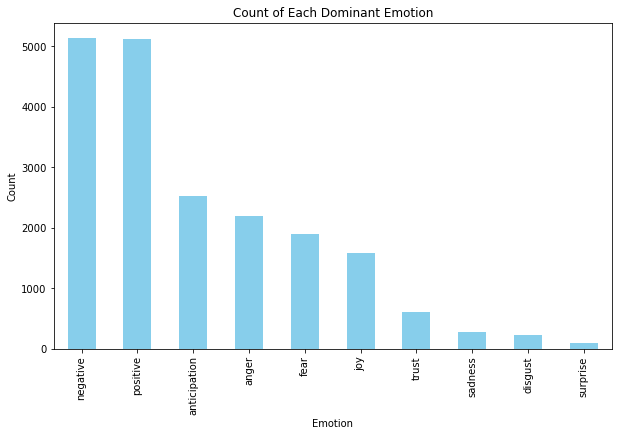

In [170]:
import matplotlib.pyplot as plt

# Assuming emotion_counts is the result of df['dominant_emotion'].value_counts()
emotion_counts = df['dominant_emotion'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Dominant Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


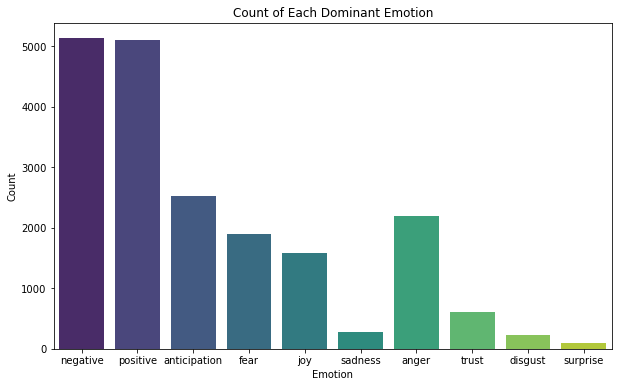

In [171]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='dominant_emotion', data=df, palette='viridis')
plt.title('Count of Each Dominant Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


## Do a wordcloud for the datasets

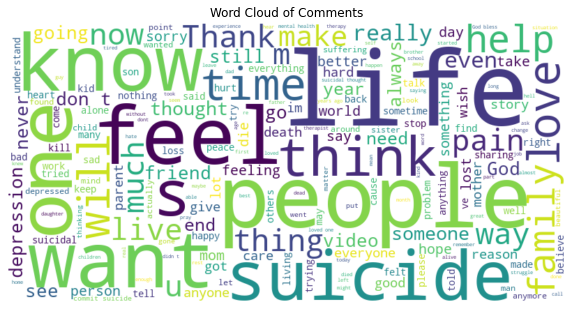

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#copy df into a new dataframe df_word_cloud
df_word_cloud = df.copy()
# Assuming df is your DataFrame
text = ' '.join(df_word_cloud['comment'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image                        
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()


## Reducing class labels 

In [282]:
emotion_counts = df['dominant_emotion'].value_counts()
print(emotion_counts)


negative         5135
positive         5112
anticipation     2524
anger_disgust    2418
sadness_fear     2184
joy              1584
Name: dominant_emotion, dtype: int64


In [280]:
# Combine "anger" and "disgust" into a single class
df['dominant_emotion'] = df['dominant_emotion'].replace({'anger': 'anger_disgust', 'disgust': 'anger_disgust'})

# Remove "surprise" and "trust" classes
df = df[~df['dominant_emotion'].isin(['surprise', 'trust'])]

In [281]:
df['dominant_emotion'] = df['dominant_emotion'].replace({'sadness': 'sadness_fear', 'fear': 'sadness_fear'})


## Model Training 

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df is your DataFrame with 'comment' and 'dominant_emotion' columns
# If you have more columns, adjust accordingly

# Drop rows with missing values
df.dropna(subset=['comment', 'dominant_emotion'], inplace=True)

# Encode labels (dominant_emotion) to numerical values
label_encoder = LabelEncoder()
df['encoded_dominant_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['comment'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['comment']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['comment']), maxlen=max_len)

# Build a simple LSTM model for multi-class classification
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
y_train = train_df['encoded_dominant_emotion']
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_test = test_df['encoded_dominant_emotion']
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/5
443/443 [==============================] - 78s 161ms/step - loss: 1.8312 - accuracy: 0.2923 - val_loss: 1.6989 - val_accuracy: 0.3710
Epoch 2/5
443/443 [==============================] - 75s 169ms/step - loss: 1.4586 - accuracy: 0.4851 - val_loss: 1.3385 - val_accuracy: 0.5673
Epoch 3/5
443/443 [==============================] - 79s 178ms/step - loss: 1.0537 - accuracy: 0.6601 - val_loss: 1.1752 - val_accuracy: 0.6252
Epoch 4/5
443/443 [==============================] - 77s 174ms/step - loss: 0.8149 - accuracy: 0.7513 - val_loss: 1.1615 - val_accuracy: 0.6455
Epoch 5/5
123/123 [==============================] - 3s 25ms/step - loss: 1.1600 - accuracy: 0.6580
Test Accuracy: 65.80%


## Testing using SMOTE 

In [270]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming df is your DataFrame with 'comment' and 'dominant_emotion' columns
# If you have more columns, adjust accordingly

# Drop rows with missing values
df.dropna(subset=['comment', 'dominant_emotion'], inplace=True)

# Encode labels (dominant_emotion) to numerical values
label_encoder = LabelEncoder()
df['encoded_dominant_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['comment'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['comment']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['comment']), maxlen=max_len)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, train_df['encoded_dominant_emotion'])

# Count the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(Counter(y_resampled))

# Build a simple LSTM model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with the resampled data
model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_test = test_df['encoded_dominant_emotion']
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Class distribution after applying SMOTE:
Counter({3: 4138, 0: 4138, 4: 4138, 5: 4138, 1: 4138, 2: 4138})
Epoch 1/5
699/699 [==============================] - 118s 159ms/step - loss: 1.5972 - accuracy: 0.3020 - val_loss: 2.8547 - val_accuracy: 0.0439
Epoch 2/5
699/699 [==============================] - 116s 165ms/step - loss: 1.2795 - accuracy: 0.4803 - val_loss: 3.8468 - val_accuracy: 0.0556
Epoch 3/5
699/699 [==============================] - 120s 171ms/step - loss: 1.0352 - accuracy: 0.6011 - val_loss: 4.4243 - val_accuracy: 0.0608
Epoch 4/5
699/699 [==============================] - 125s 178ms/step - loss: 0.8924 - accuracy: 0.6548 - val_loss: 4.9299 - val_accuracy: 0.0596
Epoch 5/5
119/119 [==============================] - 3s 24ms/step - loss: 1.0510 - accuracy: 0.6611
Test Accuracy: 66.11%


In [15]:
!pip install imbalanced-learn


   -------------------------------------- 235.6/235.6 kB 320.6 kB/s eta 0:00:00
   ---------------------------------------- 302.2/302.2 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df is your DataFrame with 'comment' and 'dominant_emotion' columns

# Drop rows with missing values
df.dropna(subset=['comment', 'dominant_emotion'], inplace=True)

# Encode labels (positive, negative, etc.) to numerical values
label_encoder = LabelEncoder()
df['encoded_dominant_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['comment'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['comment']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['comment']), maxlen=max_len)

# Resample the training data (oversampling)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, train_df['encoded_dominant_emotion'])

# Build a simple LSTM model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with resampled data
model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_test = test_df['encoded_dominant_emotion']
loss, accuracy = model.evaluate(pad_sequences(tokenizer.texts_to_sequences(test_df['comment']), maxlen=max_len), y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/5
611/611 [==============================] - 60s 91ms/step - loss: 1.4682 - accuracy: 0.4783 - val_loss: 3.6003 - val_accuracy: 0.1206
Epoch 2/5
611/611 [==============================] - 57s 93ms/step - loss: 0.6163 - accuracy: 0.7905 - val_loss: 2.8823 - val_accuracy: 0.1206
Epoch 3/5
611/611 [==============================] - 58s 95ms/step - loss: 0.3774 - accuracy: 0.8796 - val_loss: 2.5173 - val_accuracy: 0.1206
Epoch 4/5
611/611 [==============================] - 60s 98ms/step - loss: 0.2555 - accuracy: 0.9222 - val_loss: 2.3065 - val_accuracy: 0.1238
Epoch 5/5
62/62 [==============================] - 1s 17ms/step - loss: 1.5966 - accuracy: 0.5892
Test Accuracy: 58.92%


In [283]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df is your DataFrame with 'comment' and 'dominant_emotion' columns

# Drop rows with missing values
df.dropna(subset=['comment', 'dominant_emotion'], inplace=True)

# Encode labels (positive, negative, etc.) to numerical values
label_encoder = LabelEncoder()
df['encoded_dominant_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['comment'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['comment']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['comment']), maxlen=max_len)

# Resample the training data (oversampling)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, train_df['encoded_dominant_emotion'])

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_cnn_model():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_dense_model():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate LSTM model
lstm_model = create_lstm_model()
lstm_model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.1)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, test_df['encoded_dominant_emotion'])

# Train and evaluate GRU model
gru_model = create_gru_model()
gru_model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.1)
gru_loss, gru_accuracy = gru_model.evaluate(X_test, test_df['encoded_dominant_emotion'])

# Train and evaluate Bidirectional LSTM model
bidirectional_lstm_model = create_bidirectional_lstm_model()
bidirectional_lstm_model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.1)
bidirectional_lstm_loss, bidirectional_lstm_accuracy = bidirectional_lstm_model.evaluate(X_test, test_df['encoded_dominant_emotion'])

# Train and evaluate CNN model
cnn_model = create_cnn_model()
cnn_model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.1)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, test_df['encoded_dominant_emotion'])

# Train and evaluate Dense model
dense_model = create_dense_model()
dense_model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.1)
dense_loss, dense_accuracy = dense_model.evaluate(X_test, test_df['encoded_dominant_emotion'])

# Compare model accuracies
models = ['LSTM', 'GRU', 'Bidirectional LSTM', 'CNN', 'Dense']
accuracies = [lstm_accuracy, gru_accuracy, bidirectional_lstm_accuracy, cnn_accuracy, dense_accuracy]

for model, accuracy in zip(models, accuracies):
    print(f'{model} Accuracy: {accuracy * 100:.2f}%')


Epoch 1/5
699/699 [==============================] - 68s 92ms/step - loss: 1.3077 - accuracy: 0.4860 - val_loss: 1.8059 - val_accuracy: 0.1204
Epoch 2/5
699/699 [==============================] - 71s 101ms/step - loss: 0.6788 - accuracy: 0.7619 - val_loss: 1.1366 - val_accuracy: 0.5812
Epoch 3/5
699/699 [==============================] - 68s 98ms/step - loss: 0.4125 - accuracy: 0.8623 - val_loss: 0.8499 - val_accuracy: 0.6685
Epoch 4/5
699/699 [==============================] - 69s 98ms/step - loss: 0.2860 - accuracy: 0.9070 - val_loss: 0.3964 - val_accuracy: 0.8800
Epoch 5/5
119/119 [==============================] - 2s 14ms/step - loss: 1.0197 - accuracy: 0.7226
Epoch 1/5
699/699 [==============================] - 67s 91ms/step - loss: 1.3274 - accuracy: 0.4726 - val_loss: 1.7111 - val_accuracy: 0.2735
Epoch 2/5
699/699 [==============================] - 63s 91ms/step - loss: 0.6245 - accuracy: 0.7789 - val_loss: 1.0045 - val_accuracy: 0.5610
Epoch 3/5
699/699 [======================

In [ ]:
.

In [196]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with "comment" and "dominant_emotion" columns
df['comment'] = df['comment'].astype(str)

# Convert target variable to categorical
label_encoder = LabelEncoder()
df['dominant_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

X = df['comment']
y = df['dominant_emotion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train your model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
X_test_resampled = tfidf_vectorizer.transform(X_test)
y_pred = model.predict(X_test_resampled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 52.71%


In [ ]:
## Experimenting with GRU

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df is your DataFrame with 'comment' and 'dominant_emotion' columns
# If you have more columns, adjust accordingly

# Drop rows with missing values
df.dropna(subset=['comment', 'dominant_emotion'], inplace=True)

# Encode labels (dominant_emotion) to numerical values
label_encoder = LabelEncoder()
df['encoded_dominant_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['comment'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['comment']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['comment']), maxlen=max_len)

# Build a simple GRU model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))  # Increased number of units
model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
y_train = train_df['encoded_dominant_emotion']
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_test = test_df['encoded_dominant_emotion']
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/5
388/388 [==============================] - 53s 127ms/step - loss: 1.7759 - accuracy: 0.3309 - val_loss: 1.5288 - val_accuracy: 0.4481
Epoch 2/5
388/388 [==============================] - 54s 138ms/step - loss: 1.1851 - accuracy: 0.6148 - val_loss: 1.1155 - val_accuracy: 0.6434
Epoch 3/5
388/388 [==============================] - 53s 138ms/step - loss: 0.7782 - accuracy: 0.7576 - val_loss: 1.0161 - val_accuracy: 0.6797
Epoch 4/5
388/388 [==============================] - 54s 139ms/step - loss: 0.5458 - accuracy: 0.8303 - val_loss: 1.0495 - val_accuracy: 0.6805
Epoch 5/5
185/185 [==============================] - 6s 32ms/step - loss: 1.1749 - accuracy: 0.6846
Test Accuracy: 68.46%


In [29]:
!pip install tensorflow scikit-learn

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'comment' is your text data and 'dominant_emotion' is the target variable
# Replace 'df' with your actual DataFrame

# Step 1: Data Preprocessing
df = shuffle(df, random_state=42)  # Shuffle the DataFrame

# Encode the target variable
label_encoder = LabelEncoder()
df['encoded_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['comment'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['comment'])

# Step 3: Resampling using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, train_df['encoded_emotion'])

# Step 4: LSTM Model
vocab_size = len(tfidf_vectorizer.get_feature_names_out())
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_resampled.shape[1]))
model.add(LSTM(100))
model.add(Dense(10, activation='softmax'))  # Assuming you have 10 emotions
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert sparse matrix to an array of strings
X_resampled_array = X_resampled.astype(str)

# Step 5: Tokenization
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_resampled_array)

# Tokenize the text
X_resampled_tokens = tokenizer.texts_to_sequences(X_resampled_array)




# Padding
X_train_pad = pad_sequences(X_train_tokens, maxlen=X_resampled.shape[1], padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=X_resampled.shape[1], padding='post')

# Step 6: Train the LSTM model
model.fit(X_train_pad, y_resampled, epochs=5, validation_data=(X_test_pad, test_df['encoded_emotion']))

# Step 7: Evaluate the Model
y_pred = model.predict_classes(X_test_pad)
accuracy = accuracy_score(test_df['encoded_emotion'], y_pred)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(test_df['encoded_emotion'], y_pred, target_names=label_encoder.classes_))


AttributeError: lower not found

In [202]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assuming df is your DataFrame with 'comment' and 'dominant_emotion' columns
# If you have more columns, adjust accordingly

# Drop rows with missing values
df.dropna(subset=['comment', 'dominant_emotion'], inplace=True)

# Encode labels (dominant_emotion) to numerical values
label_encoder = LabelEncoder()
df['encoded_dominant_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['comment'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['comment']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['comment']), maxlen=max_len)

# Apply random undersampling to the training set
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, train_df['encoded_dominant_emotion'])

# Count the class distribution after applying random undersampling
print("Class distribution after applying random undersampling:")
print(Counter(y_resampled))


Class distribution after applying random undersampling:
Counter({0: 71, 1: 71, 2: 71, 3: 71, 4: 71, 5: 71, 6: 71, 7: 71, 8: 71, 9: 71})


In [268]:
# Assuming df is your DataFrame with 'comment' and 'dominant_emotion' columns
# If you have more columns, adjust accordingly

# Drop rows with missing values
df.dropna(subset=['comment', 'dominant_emotion'], inplace=True)

# Combine "anger" and "disgust" into a single class
#df['dominant_emotion'] = df['dominant_emotion'].replace({'anger': 'anger_disgust', 'disgust': 'anger_disgust'})

# Remove "surprise" and "trust" classes
#df = df[~df['dominant_emotion'].isin(['surprise', 'trust'])]

# Encode labels (dominant_emotion) to numerical values
label_encoder = LabelEncoder()
df['encoded_dominant_emotion'] = label_encoder.fit_transform(df['dominant_emotion'])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['comment'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['comment']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['comment']), maxlen=max_len)

# Calculate class weights based on class distribution
class_counts = train_df['encoded_dominant_emotion'].value_counts()
total_samples = len(train_df)

class_weights = total_samples / (len(class_labels) * class_counts)
class_weight_dict = dict(zip(class_labels, class_weights))

# Build a simple GRU model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(df['encoded_dominant_emotion'].nunique(), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with class weights
model.fit(X_train, train_df['encoded_dominant_emotion'], epochs=6, batch_size=32, validation_split=0.1, class_weight=class_weight_dict)

# Evaluate the model on the test set
y_test = test_df['encoded_dominant_emotion']
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/6
427/427 [==============================] - 37s 79ms/step - loss: 1.5238 - accuracy: 0.3670 - val_loss: 1.2428 - val_accuracy: 0.5287
Epoch 2/6
427/427 [==============================] - 36s 84ms/step - loss: 0.9935 - accuracy: 0.6076 - val_loss: 1.0041 - val_accuracy: 0.6374
Epoch 3/6
427/427 [==============================] - 36s 85ms/step - loss: 0.6805 - accuracy: 0.7391 - val_loss: 0.9180 - val_accuracy: 0.6856
Epoch 4/6
427/427 [==============================] - 37s 87ms/step - loss: 0.4849 - accuracy: 0.8162 - val_loss: 0.9806 - val_accuracy: 0.6915
Epoch 5/6
427/427 [==============================] - 38s 88ms/step - loss: 0.3654 - accuracy: 0.8606 - val_loss: 0.9424 - val_accuracy: 0.7146
Epoch 6/6
119/119 [==============================] - 1s 12ms/step - loss: 0.9672 - accuracy: 0.7097
Test Accuracy: 70.97%
